# Titanic Data Analysis

In [67]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [68]:
pd.set_option('display.max_rows',100,'display.max_columns',100)

In [69]:
#Importing Dataset
df=pd.read_csv('train.csv')
#df

In [70]:
#Dataset View
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00 %,1,0,A/5 21171,7.25 %,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00 %,1,0,PC 17599,71.28 %,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00 %,0,0,STON/O2. 3101282,7.92 %,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00 %,1,0,113803,53.10 %,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00 %,0,0,373450,8.05 %,NaN,S


In [71]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
#Perecentage of missing values in each column
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)

PassengerId    0.00 %
Survived       0.00 %
Pclass         0.00 %
Name           0.00 %
Sex            0.00 %
Age           19.87 %
SibSp          0.00 %
Parch          0.00 %
Ticket         0.00 %
Fare           0.00 %
Cabin         77.10 %
Embarked       0.22 %
dtype: float64


In [73]:
#Missing Value Plot
import missingno as msno

<AxesSubplot:>

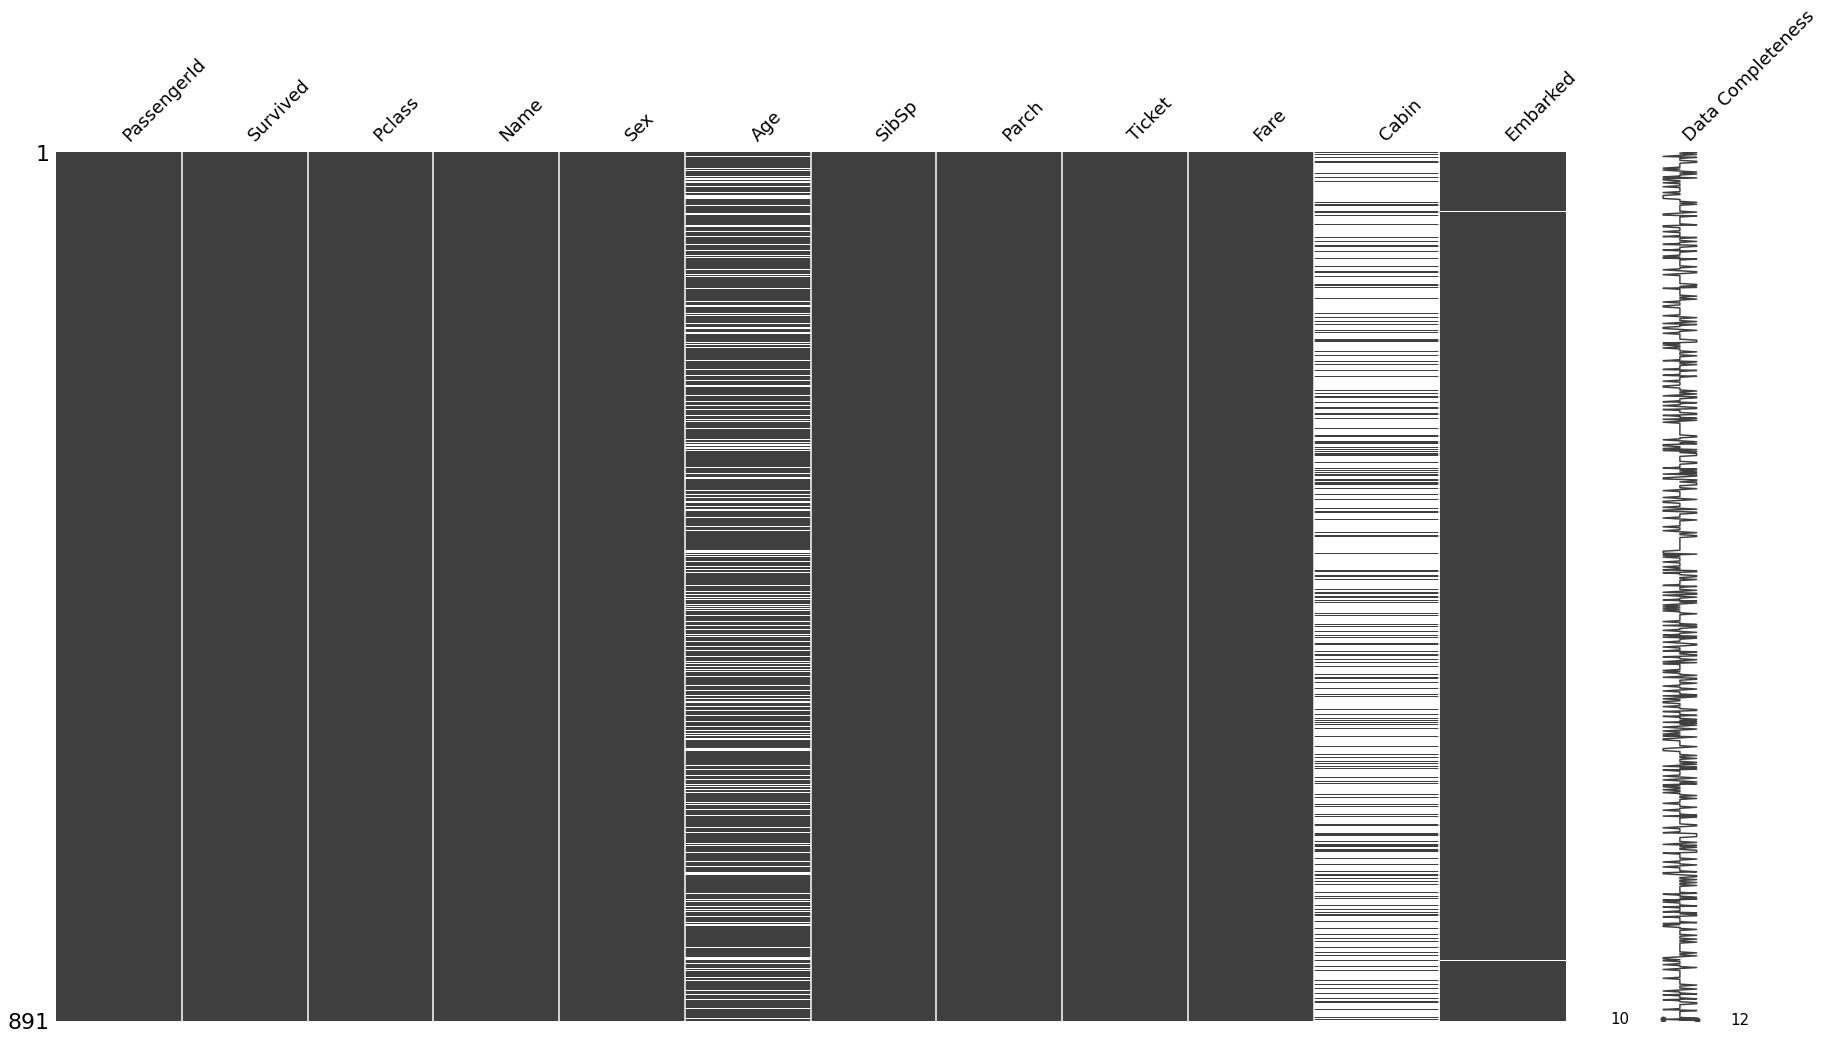

In [74]:
#Visualize missing values as a matrix
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=18)


In [75]:
#Summary Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00 %,891.00 %,891.00 %,714.00 %,891.00 %,891.00 %,891.00 %
mean,446.00 %,0.38 %,2.31 %,29.70 %,0.52 %,0.38 %,32.20 %
std,257.35 %,0.49 %,0.84 %,14.53 %,1.10 %,0.81 %,49.69 %
min,1.00 %,0.00 %,1.00 %,0.42 %,0.00 %,0.00 %,0.00 %
25%,223.50 %,0.00 %,2.00 %,20.12 %,0.00 %,0.00 %,7.91 %
50%,446.00 %,0.00 %,3.00 %,28.00 %,0.00 %,0.00 %,14.45 %
75%,668.50 %,1.00 %,3.00 %,38.00 %,1.00 %,0.00 %,31.00 %
max,891.00 %,1.00 %,3.00 %,80.00 %,8.00 %,6.00 %,512.33 %


In [76]:
#Here Each Attribute Visualised Individually.
#Survived
print(df['Survived'].unique())

[0 1]


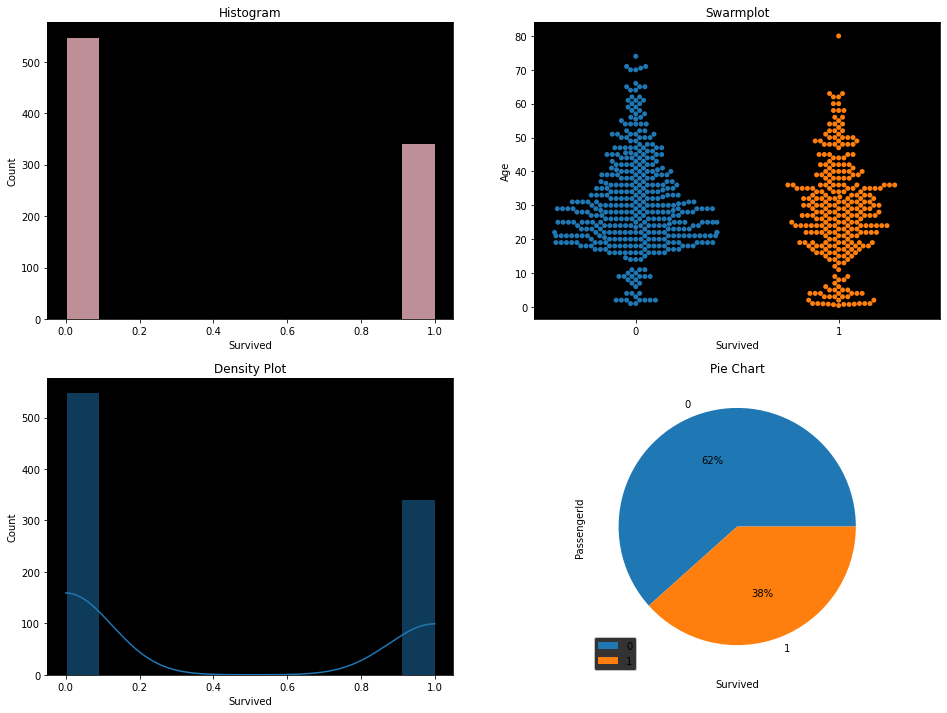

In [77]:
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = 'black'
ax1 = plt.subplot(2,2,1)
sns.histplot(data=df['Survived'],ax=ax1,color='pink')
ax1=plt.title('Histogram')
ax2 = plt.subplot(2,2,2)
sns.swarmplot(x='Survived',y='Age',data=df,ax=ax2)
ax2=plt.title('Swarmplot')
ax3 = plt.subplot(2,2,3)
sns.histplot(df['Survived'],kde=True,ax=ax3)
ax3=plt.title('Density Plot')
ax4 = plt.subplot(2,2,4)
df.groupby(['Survived']).count().plot(kind='pie',y='PassengerId',autopct='%1.0f%%',ax=ax4)
ax4=plt.xlabel('Survived')
ax4=plt.title('Pie Chart')
plt.show()

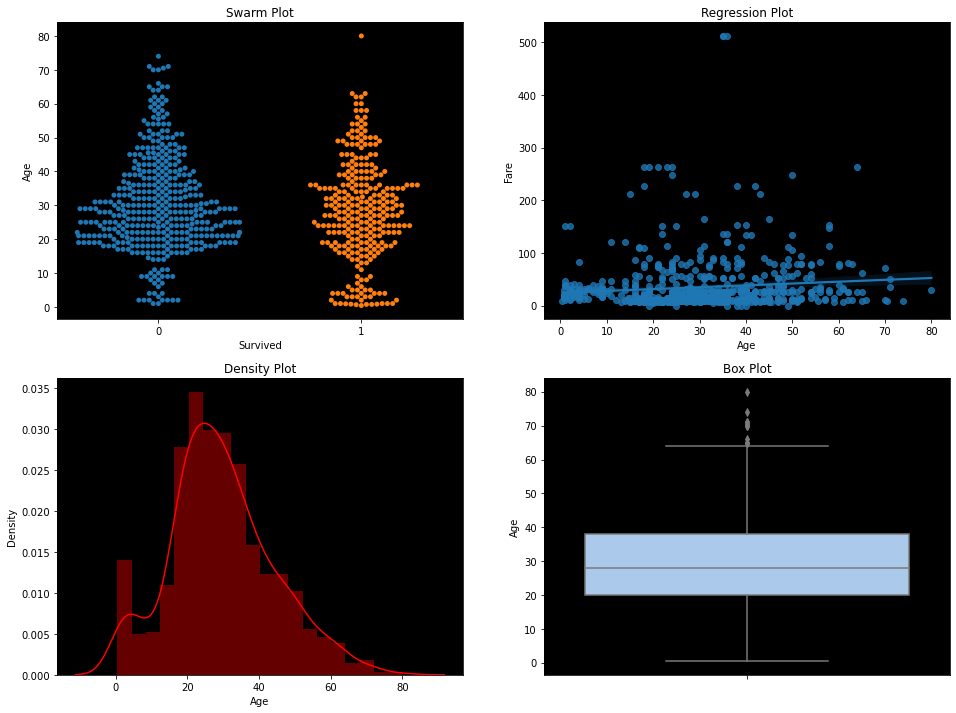

In [78]:
#Age
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = 'black'
ax1 = plt.subplot(2,2,1)
sns.swarmplot(x='Survived',y='Age',data=df,ax=ax1)
ax1=plt.title('Swarm Plot')
ax2 = plt.subplot(2,2,2)
sns.regplot(x='Age',y='Fare',data=df,ax=ax2)
ax2=plt.title('Regression Plot')
ax3 = plt.subplot(2,2,3)
sns.distplot(df['Age'],kde=True,color='red',ax=ax3)
ax3=plt.title('Density Plot')
ax4 = plt.subplot(2,2,4)
sns.boxplot(y='Age',data=df,ax=ax4,palette='pastel')
ax4=plt.title('Box Plot')
plt.show()

In [79]:
#Pclass
print(df['Pclass'].unique())

[3 1 2]


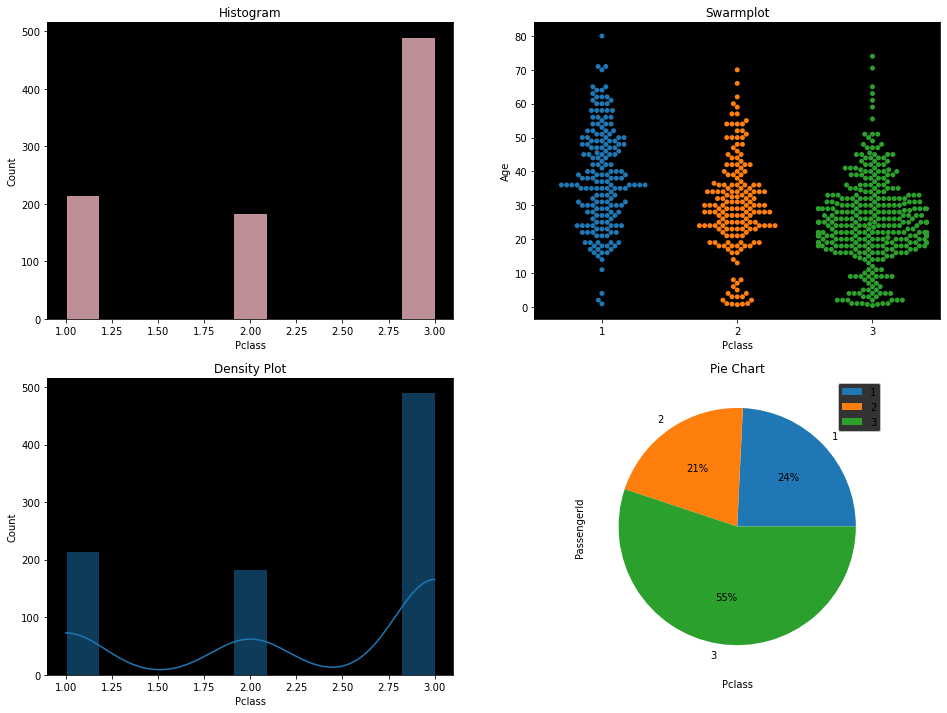

In [80]:
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = 'black'
ax1 = plt.subplot(2,2,1)
sns.histplot(data=df['Pclass'],ax=ax1,color='pink')
ax1=plt.title('Histogram')
ax2 = plt.subplot(2,2,2)
sns.swarmplot(x='Pclass',y='Age',data=df,ax=ax2)
ax2=plt.title('Swarmplot')
ax3 = plt.subplot(2,2,3)
sns.histplot(df['Pclass'],kde=True,ax=ax3)
ax3=plt.title('Density Plot')
ax4 = plt.subplot(2,2,4)
df.groupby(['Pclass']).count().plot(kind='pie',y='PassengerId',autopct='%1.0f%%',ax=ax4)
ax4=plt.xlabel('Pclass')
ax4=plt.title('Pie Chart')
plt.show()

In [81]:
#Sex
df['Sex'].unique()

array(['male', 'female'], dtype=object)

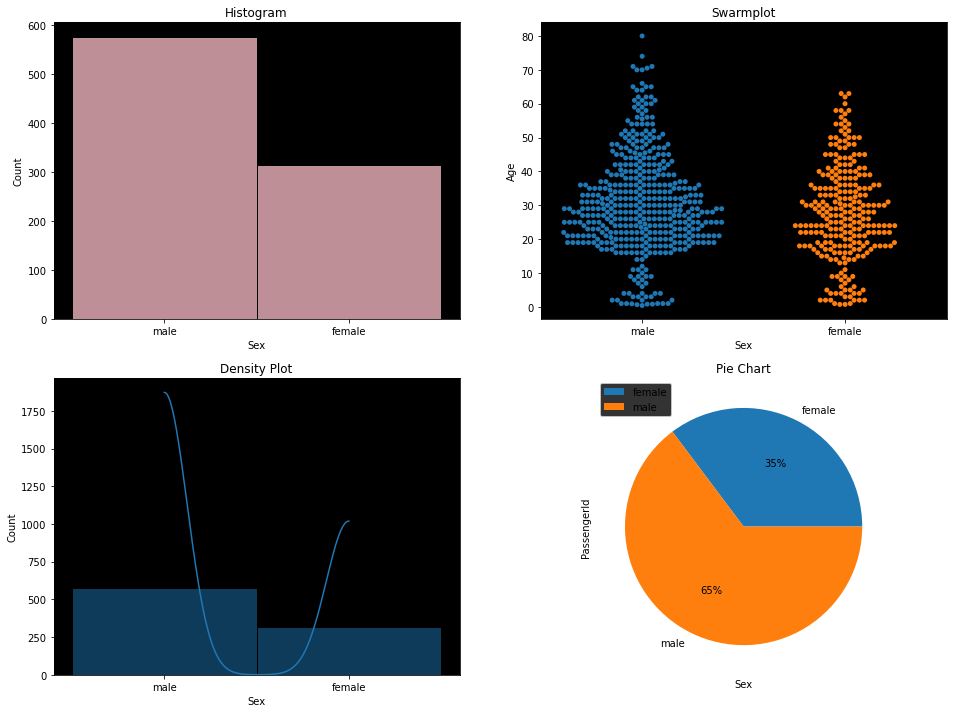

In [82]:
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = 'black'
ax1 = plt.subplot(2,2,1)
sns.histplot(data=df['Sex'].dropna(),ax=ax1,color='pink')
ax1=plt.title('Histogram')
ax2 = plt.subplot(2,2,2)
sns.swarmplot(x='Sex',y='Age',data=df,ax=ax2)
ax2=plt.title('Swarmplot')
ax3 = plt.subplot(2,2,3)
sns.histplot(df['Sex'].dropna(),kde=True,ax=ax3)
ax3=plt.title('Density Plot')
ax4 = plt.subplot(2,2,4)
df.groupby(['Sex']).count().plot(kind='pie',y='PassengerId',autopct='%1.0f%%',ax=ax4)
ax4=plt.xlabel('Sex')
ax4=plt.title('Pie Chart')
plt.show()

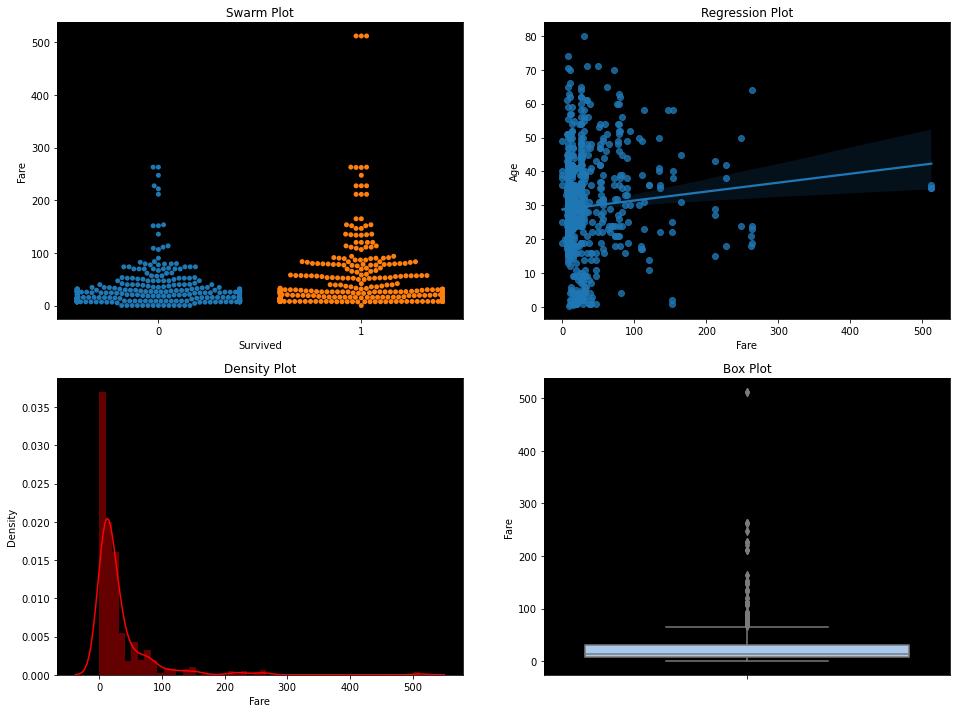

In [83]:
#Fare
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = 'black'
ax1 = plt.subplot(2,2,1)
sns.swarmplot(x='Survived',y='Fare',data=df,ax=ax1)
ax1=plt.title('Swarm Plot')
ax2 = plt.subplot(2,2,2)
sns.regplot(x='Fare',y='Age',data=df,ax=ax2)
ax2=plt.title('Regression Plot')
ax3 = plt.subplot(2,2,3)
sns.distplot(df['Fare'],kde=True,color='red',ax=ax3)
ax3=plt.title('Density Plot')
ax4 = plt.subplot(2,2,4)
sns.boxplot(y='Fare',data=df,ax=ax4,palette='pastel')
ax4=plt.title('Box Plot')
plt.show()

In [84]:
#SibSp
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

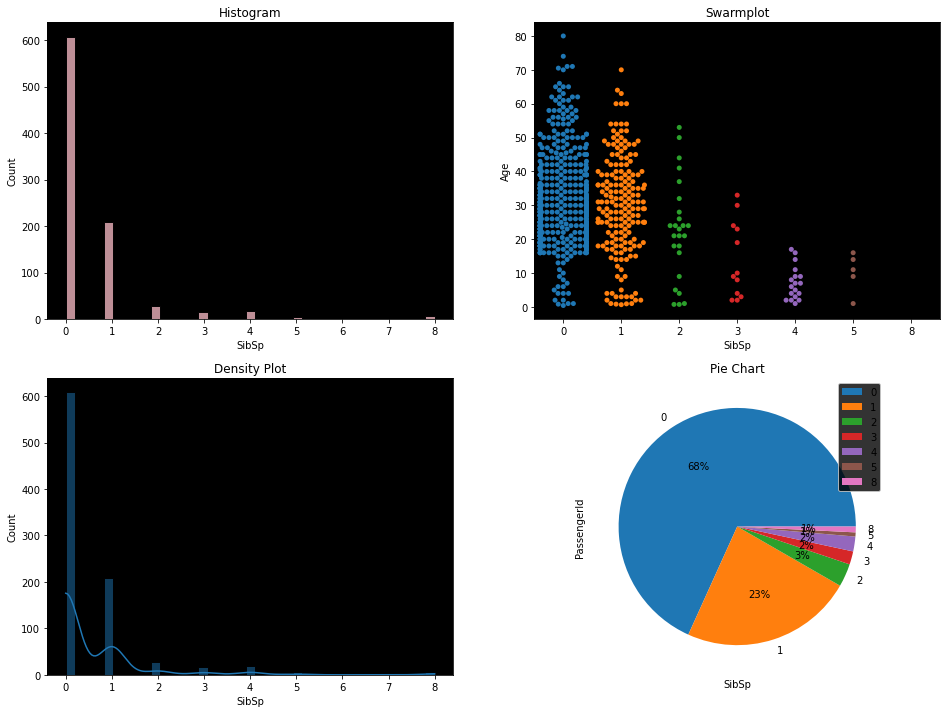

In [85]:
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = 'black'
ax1 = plt.subplot(2,2,1)
sns.histplot(data=df['SibSp'],ax=ax1,color='pink')
ax1=plt.title('Histogram')
ax2 = plt.subplot(2,2,2)
sns.swarmplot(x='SibSp',y='Age',data=df,ax=ax2)
ax2=plt.title('Swarmplot')
ax3 = plt.subplot(2,2,3)
sns.histplot(df['SibSp'],kde=True,ax=ax3)
ax3=plt.title('Density Plot')
ax4 = plt.subplot(2,2,4)
df.groupby(['SibSp']).count().plot(kind='pie',y='PassengerId',autopct='%1.0f%%',ax=ax4)
ax4=plt.xlabel('SibSp')
ax4=plt.title('Pie Chart')
plt.show()

In [86]:
#Parch
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

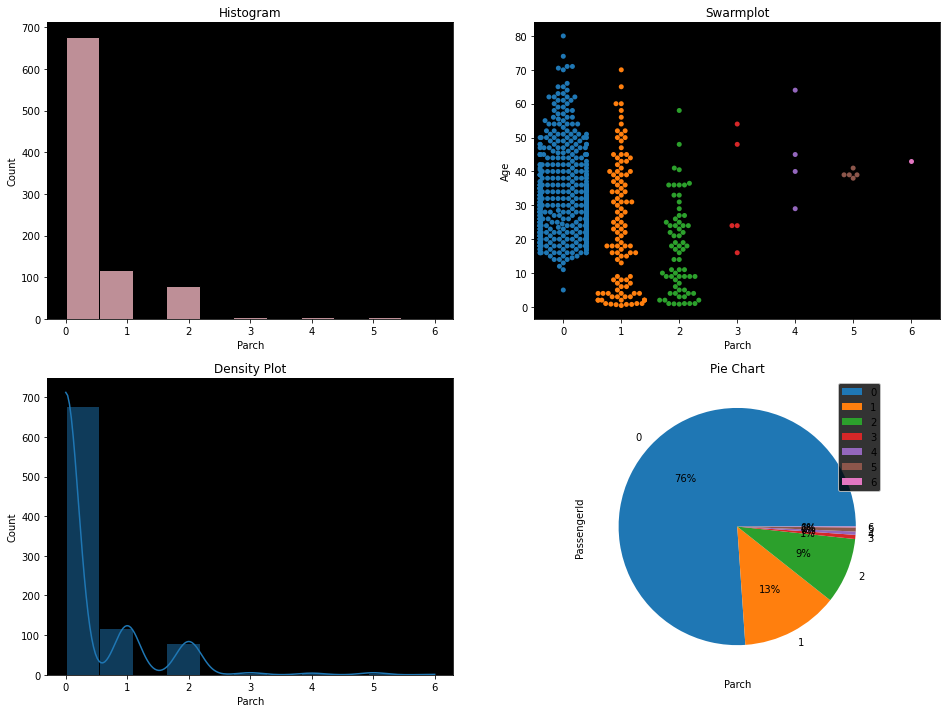

In [87]:
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = 'black'
ax1 = plt.subplot(2,2,1)
sns.histplot(data=df['Parch'],ax=ax1,color='pink')
ax1=plt.title('Histogram')
ax2 = plt.subplot(2,2,2)
sns.swarmplot(x='Parch',y='Age',data=df,ax=ax2)
ax2=plt.title('Swarmplot')
ax3 = plt.subplot(2,2,3)
sns.histplot(df['Parch'],kde=True,ax=ax3)
ax3=plt.title('Density Plot')
ax4 = plt.subplot(2,2,4)
df.groupby(['Parch']).count().plot(kind='pie',y='PassengerId',autopct='%1.0f%%',ax=ax4)
ax4=plt.xlabel('Parch')
ax4=plt.title('Pie Chart')
plt.show()

In [88]:
#Embarked
print(df['Embarked'].unique())

['S' 'C' 'Q' nan]


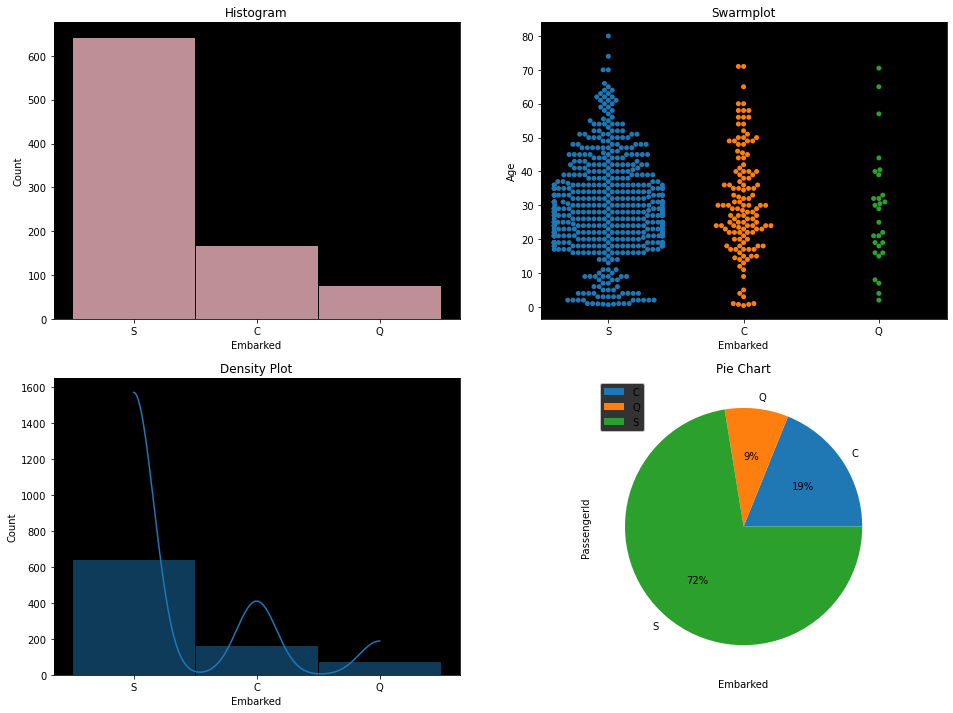

In [89]:
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = 'black'
ax1 = plt.subplot(2,2,1)
sns.histplot(data=df['Embarked'].dropna(),ax=ax1,color='pink')
ax1=plt.title('Histogram')
ax2 = plt.subplot(2,2,2)
sns.swarmplot(x='Embarked',y='Age',data=df,ax=ax2)
ax2=plt.title('Swarmplot')
ax3 = plt.subplot(2,2,3)
sns.histplot(df['Embarked'].dropna(),kde=True,ax=ax3)
ax3=plt.title('Density Plot')
ax4 = plt.subplot(2,2,4)
df.groupby(['Embarked']).count().plot(kind='pie',y='PassengerId',autopct='%1.0f%%',ax=ax4)
ax4=plt.xlabel('Embarked')
ax4=plt.title('Pie Chart')
plt.show()

In [90]:
#Cabin
print(df['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [91]:
df['Cabin'].nunique()

147

In [100]:
#Ticket
df['Ticket'].nunique()

681